Twinkle Devda                                                                                                                                        
21110228

1.                                                                                                                                                      
For matrix multiplication, first, all the elements of the first row of the first matrix are multiplied simultaneously with the first column of the second matrix, and then they are added. So as the first row and first column are multiplied, it makes 'k' multiplications, and then it is repeated with all columns of the second matrix, which makes 'mk' multiplications and then for all rows of the first matrix, which makes total 'nkm' multiplications. In the same way as the first row and the first column are multiplied, it makes 'k-1' additions and the same is repeated for all columns and rows, which makes total 'nm(k-1)' additions.                                                                                                      
Multiplications: nkm                                                                                                                                   
Additions: n(k-1)m

2. Matrix Multiplication                                                                                                                                
   It can be seen that for the (2x3) and (3x2), the python code (around 4 micro sec) takes less time than numpy code (around 6 micro sec) but is almost comparable. For the larger matrices numpy code (around 11 micro sec) works better than python code (around 30 micro sec). So, numpy works better because it uses highly optimized code and is implemented in C so it takes less time than the python code.

In [150]:
m=[[1,2,3],
  [4,5,6]]
n=[[1,2],
  [3,4],
  [5,6]]
# m=[[1,2,3,4,5],
#    [6,7,8,9,10],
#    [11,12,13,14,15],
#    [16,17,18,19,20],
#    [21,22,23,24,25]]
# n=[[1,2,3,4,5],
#    [6,7,8,9,10],
#    [11,12,13,14,15],
#    [16,17,18,19,20],
#    [21,22,23,24,25]]
m_n=[([0]*len(n[0])) for i in range(len(m))]

for i in range(len(m)):
    for j in range(len(n[0])):
        for k in range(len(m[0])):
            m_n[i][j]+= m[i][k]*n[k][j]

print(m_n)

[[22, 28], [49, 64]]


In [151]:
import numpy as np
m=np.array([[1,2,3],
            [4,5,6]])
n=np.array([[1,2],
            [3,4],
            [5,6]])
# m=np.array([[1,2,3,4,5],
#             [6,7,8,9,10],
#             [11,12,13,14,15],
#             [16,17,18,19,20],
#             [21,22,23,24,25]])
# n=np.array([[1,2,3,4,5],
#             [6,7,8,9,10],
#             [11,12,13,14,15],
#             [16,17,18,19,20],
#             [21,22,23,24,25]])
m_n=m.dot(n)
print(m_n)

[[22 28]
 [49 64]]


In [152]:
%%timeit
# m=[[1,2,3],
#   [4,5,6]]
# n=[[1,2],
#   [3,4],
#   [5,6]]
m=[[1,2,3,4,5],
   [6,7,8,9,10],
   [11,12,13,14,15],
   [16,17,18,19,20],
   [21,22,23,24,25]]
n=[[1,2,3,4,5],
   [6,7,8,9,10],
   [11,12,13,14,15],
   [16,17,18,19,20],
   [21,22,23,24,25]]
m_n=[([0]*len(n[0])) for i in range(len(m))]

for i in range(len(m)):
    for j in range(len(n[0])):
        for k in range(len(m[0])):
            m_n[i][j]+= m[i][k]*n[k][j]

31.2 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [153]:
%%timeit
import numpy as np
# m=np.array([[1,2,3],
#             [4,5,6]])
# n=np.array([[1,2],
#             [3,4],
#             [5,6]])
m=np.array([[1,2,3,4,5],
            [6,7,8,9,10],
            [11,12,13,14,15],
            [16,17,18,19,20],
            [21,22,23,24,25]])
n=np.array([[1,2,3,4,5],
            [6,7,8,9,10],
            [11,12,13,14,15],
            [16,17,18,19,20],
            [21,22,23,24,25]])
m_n=m.dot(n)

11.5 µs ± 334 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


3. The method takes more time than numpy.

In [154]:
# %%timeit
a=[5,6,4,3]

for i in range(len(a)):
    for j in range(len(a)):
        if a[j]>a[i]:
            temp=a[i]
            a[i]=a[j]
            a[j]=temp
print(a)
median=0
if len(a)%2==1:
    median=a[int(len(a)/2)]
if len(a)%2==0:
    median=(a[int(len(a)/2)-1]+a[int(len(a)/2)])/2
print(median)

[3, 4, 5, 6]
4.5


In [155]:
# %%timeit
a=np.array([5,6,4,3])
print(np.median(a))

4.5


4.\begin{equation}  x^2y \ \ +\ \ y^3sin(x) \end{equation}
 Differentiation w.r.t x \begin{equation}  2xy \ \ +\ \ y^3cos(x) \end{equation}
 Differentiation w.r.t y \begin{equation}  x^2 \ \ +\ \ 3y^2sin(x) \end{equation} 

5. The values computed with jax matches with the analytical solutions.

In [156]:
import jax
from jax import grad

def f(x, y):
    return (x**2 * y + y**3 * np.sin(x))

print("Jax value w.r.t x:",grad(f,argnums=0)(3.0,2.0))
print("Jax value w.r.t y:",grad(f,argnums=1)(3.0,2.0))
# print("Jax value w.r.t x:",grad(f,argnums=0)(222.8,3.4))
# print("Jax value w.r.t y:",grad(f,argnums=1)(222.8,3.4))

def diffx(x,y):
    return (2*x*y + y**3 * np.cos(x))

def diffy(x,y):
    return (x**2 + 3*y**2 * np.sin(x))

print("Analytical value w.r.t x:",diffx(3,2))
print("Analytical value w.r.t y:",diffy(3,2))
# print("Analytical value w.r.t x:",diffx(222.8,3.4))
# print("Analytical value w.r.t y:",diffy(222.8,3.4))

AttributeError: partially initialized module 'jax' has no attribute 'version' (most likely due to a circular import)

6. The analytical solution matches with solution form sympy

In [157]:
import sympy
from sympy import Symbol, Matrix, Function, simplify

x = Symbol('x')
y = Symbol('y')

f = (y * x**2) + (y ** 3 * sin(x))
dfdx=sympy.diff(f,x)
dfdy=sympy.diff(f,y)
print(dfdx)
print(dfdy)

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


7.

In [158]:
dict={
    2022:{
          "Branch 1": {"Roll No:" :1, "Name" : "N" , "Marks" : {"Maths":100, "English":70}},
          "Branch 2":{}},
    2023:
          {"Branch 1",
           "Branch 2"},
    2024:
          {"Branch 1",
           "Branch 2"},
    2025:
          {"Branch 1",
           "Branch 2"}}

print(dict[2022]["Branch 1"]["Marks"])

{'Maths': 100, 'English': 70}


8.

In [159]:
class Year:
    def __init__(self, Year_No, branches=None):
        self.Year_No = Year_No
        self.branches = branches
    
    class Branch:
        def __init__(self, No, students=None):
            self.No = No
            self.students = students 

        class Student:
            def __init__(self, Roll_No, Name, Marks=None):
                self.Roll_No = Roll_No
                self.Name = Name
                self.Marks = Marks

S_1 = Student(1, 'N', {'Maths': 100, 'English': 70})
B_1 = Branch('Branch 1', [student_1])
B_2 = Branch('Branch 2')

B__1 = Branch('Branch 1')
B__2 = Branch('Branch 2')

Y_1 = Year(2022, [B_1, B_2])
Y_2 = Year(2023,[B__1,B__2])
Y_3 = Year(2024,[B__1,B__2])
Y_4 = Year(2025,[B__1,B__2])

database = [Y_1,Y_2,Y_3,Y_4]

print(database[0].Year_No)
print(database[0].branches[0].students[0].Roll_No)
print(database[0].branches[0].students[0].Name)
print(database[0].branches[0].students[0].Marks['Maths'])
print(database[1].Year_No)
print(database[1].branches[1].No)

2022
1
N
100
2023
Branch 2


9.

Text(0.5, 1.0, 'y=exp(x)')

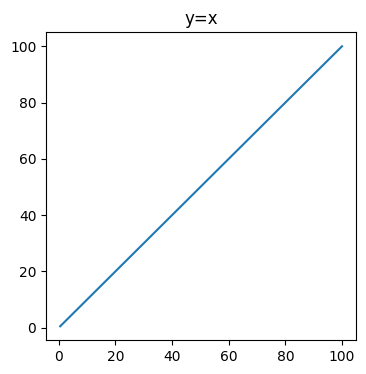

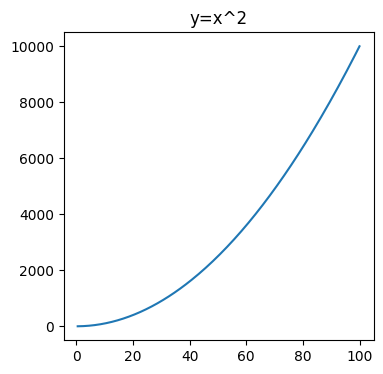

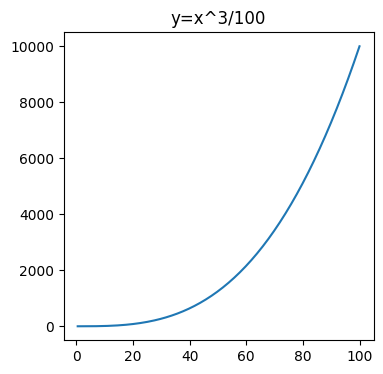

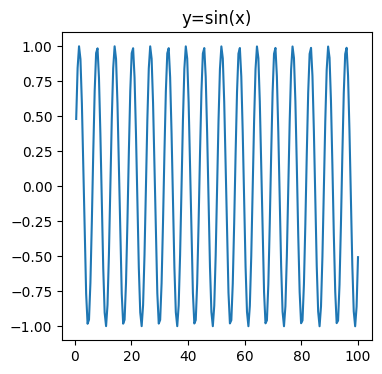

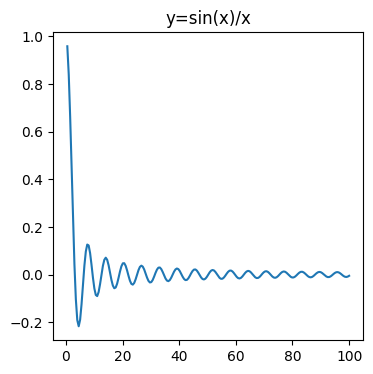

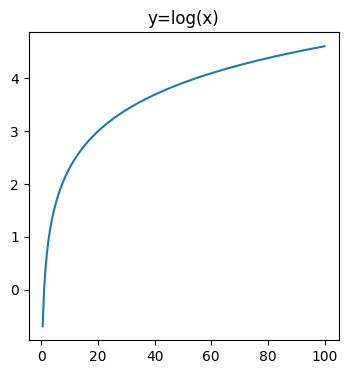

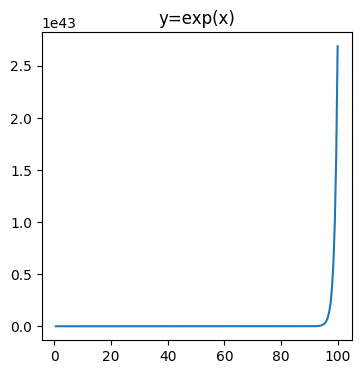

In [160]:
import matplotlib.pyplot as plt

x=np.linspace(0.5,100,199)

f1=plt.figure(figsize=(4,4))
plt.plot(x,x)
plt.title("y=x")

f2=plt.figure(figsize=(4,4))
plt.plot(x,x**2)
plt.title("y=x^2")

f3=plt.figure(figsize=(4,4))
plt.plot(x,x**3 /100)
plt.title("y=x^3/100")

f4=plt.figure(figsize=(4,4))
plt.plot(x,np.sin(x))
plt.title("y=sin(x)")

f5=plt.figure(figsize=(4,4))
plt.plot(x,np.sin(x)/x)
plt.title("y=sin(x)/x")

f6=plt.figure(figsize=(4,4))
plt.plot(x,np.log(x))
plt.title("y=log(x)")

f7=plt.figure(figsize=(4,4))
plt.plot(x,np.exp(x))
plt.title("y=exp(x)")

10.

In [161]:
b=np.random.randint(1, high=3, size=(20,5))
print(b)

[[1 2 1 2 2]
 [2 2 2 2 1]
 [1 1 1 2 2]
 [2 2 2 1 2]
 [1 1 2 1 2]
 [2 2 2 2 1]
 [2 2 1 1 2]
 [1 1 2 1 2]
 [1 1 1 2 1]
 [2 2 1 1 1]
 [2 1 1 1 1]
 [2 2 1 1 1]
 [2 2 1 1 2]
 [2 2 1 2 2]
 [1 1 1 2 2]
 [1 1 1 1 2]
 [1 1 2 2 1]
 [1 2 2 2 2]
 [1 1 2 2 2]
 [2 2 2 1 2]]


In [162]:
import pandas as pd
df=pd.DataFrame(b, columns=['a','b','c','d','e'])
print(df)
print("Standard deviations:\n", df.std())
print("Means:\n",df.mean(axis=1))
print("Maximum standard deviation among all columns:",max(df.std()))
print("Minimum mean among all rows: ", min(df.mean(axis=1)))

    a  b  c  d  e
0   1  2  1  2  2
1   2  2  2  2  1
2   1  1  1  2  2
3   2  2  2  1  2
4   1  1  2  1  2
5   2  2  2  2  1
6   2  2  1  1  2
7   1  1  2  1  2
8   1  1  1  2  1
9   2  2  1  1  1
10  2  1  1  1  1
11  2  2  1  1  1
12  2  2  1  1  2
13  2  2  1  2  2
14  1  1  1  2  2
15  1  1  1  1  2
16  1  1  2  2  1
17  1  2  2  2  2
18  1  1  2  2  2
19  2  2  2  1  2
Standard deviations:
 a    0.512989
b    0.510418
c    0.510418
d    0.512989
e    0.489360
dtype: float64
Means:
 0     1.6
1     1.8
2     1.4
3     1.8
4     1.4
5     1.8
6     1.6
7     1.4
8     1.2
9     1.4
10    1.2
11    1.4
12    1.6
13    1.8
14    1.4
15    1.2
16    1.4
17    1.8
18    1.6
19    1.8
dtype: float64
Maximum standard deviation among all columns: 0.512989176042577
Minimum mean among all rows:  1.2


11.

In [163]:
df['f']=df.sum(axis=1)
df['g']=["LT8" if y < 8 else "GT8" for y in df['f']]
print (df)
print("Number of LT8:",len(df[df['g']=="LT8"]))
print("Std of LT8:", df.loc[df['g'] == 'LT8', 'f'].std())
print("Std of GT8:", df.loc[df['g'] == 'GT8', 'f'].std())

    a  b  c  d  e  f    g
0   1  2  1  2  2  8  GT8
1   2  2  2  2  1  9  GT8
2   1  1  1  2  2  7  LT8
3   2  2  2  1  2  9  GT8
4   1  1  2  1  2  7  LT8
5   2  2  2  2  1  9  GT8
6   2  2  1  1  2  8  GT8
7   1  1  2  1  2  7  LT8
8   1  1  1  2  1  6  LT8
9   2  2  1  1  1  7  LT8
10  2  1  1  1  1  6  LT8
11  2  2  1  1  1  7  LT8
12  2  2  1  1  2  8  GT8
13  2  2  1  2  2  9  GT8
14  1  1  1  2  2  7  LT8
15  1  1  1  1  2  6  LT8
16  1  1  2  2  1  7  LT8
17  1  2  2  2  2  9  GT8
18  1  1  2  2  2  8  GT8
19  2  2  2  1  2  9  GT8
Number of LT8: 10
Std of LT8: 0.48304589153964794
Std of GT8: 0.5163977794943222


12. Broadcasting is how numpy works with different sizes of arrays. While performing matrix operations there are certain constraints but because of numpy broadcasting it allows to perform calculations withouth size constraints.

In [164]:
a=np.array([1,1,1])
b=1
a+b

array([2, 2, 2])

13.

In [165]:
m=np.array([7,9,3,6,3,2,5])

def minimum(m):
    c=2**31;
    index=0;
    for i in range(len(m)):
        if m[i] <c:
            index=i
            c=m[i]
    return index

print("Index of the min element:",minimum(m))

Index of the min element: 5


In [166]:
m=np.array([7,9,3,6,3,2,5])
print("Index of the min element:",np.argmin(m))

Index of the min element: 5
